In [16]:
import xarray as xr
import numpy as np
import cartopy.feature as cf
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
Data = xr.open_dataset('chirps_21_WA_new.nc')

In [3]:
Data = Data['precip'].where(Data['precip']!=-99)

In [5]:
jdy = Data.mean(['latitude','longitude']).groupby('time.dayofyear')
jdy

DataArrayGroupBy, grouped over 'dayofyear'
366 groups with labels 1, 2, 3, 4, 5, ..., 363, 364, 365, 366.

In [6]:
def stand(x, dim):
    return (x-x.mean(dim=dim))


def inf_check(p, grid=True):
    if grid==True:
        p = p.where(p!=np.inf).where(p!=-np.inf)
    else:
        p[np.isinf(p)==True] = np.nan
    return p

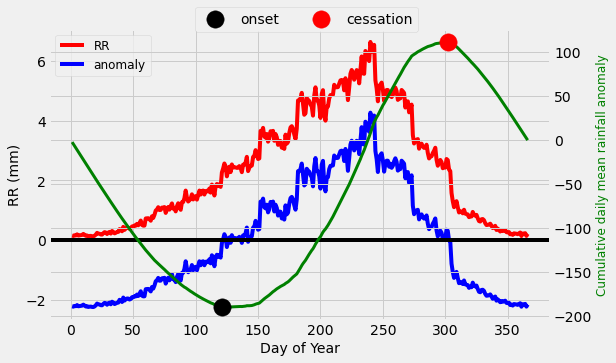

In [17]:
x = list(jdy.groups.copy())

fig, ax = plt.subplots(figsize=(8,5))

avg_Data = inf_check( jdy.mean() ,grid=True)
avg_Data.plot(ax=ax, color='r', label='RR')
stand(avg_Data, dim='dayofyear').plot(ax = ax, color='b', label='anomaly')

#Legend
ax.legend(loc='upper left', fontsize=12)
ax.set_ylabel('RR (mm)', fontsize=14)
ax.set_xlabel('Day of Year', fontsize=14)

ax.axhline(y=0, color='k')  #Horizontal Black Line at the Zero Mark



ax1 = ax.twinx()
anom = stand(avg_Data, dim='dayofyear').cumsum()
ax1.plot(x, anom, color='g', linewidth=3)
ax1.set_ylabel('Cumulative daily mean rainfall anomaly', fontsize=12, color='g')   #Set a Label



#Onset and Cessation Detection
anomaly = anom.values
dx = 28  #Detection Window  (We use a nearly monthly interval to avoid multiple mid-month false onsets)
onset=[]; cessation=[]
for i in range(dx,len(anomaly)-dx):
    if np.min(anomaly[i-dx:i+dx]) == anomaly[i]:
        onset.append([i+1,anomaly[i+1]])
    if np.max(anomaly[i-dx:i+dx]) == anomaly[i]:
        cessation.append([i+1,anomaly[i+1]])
        
        
ax1.scatter(np.copy(onset).T[0],np.copy(onset).T[1], 300, color='k', zorder=5, label='onset')
ax1.scatter(np.copy(cessation).T[0],np.copy(cessation).T[1], 300, color='r', zorder=5, label='cessation')
ax1.legend(loc=0, ncol=2, bbox_to_anchor=(0.75, 1.1))

plt.savefig('onset and cessation for west africa.png',dpi=300)

In [15]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [18]:
n = int(input())
for i in range(n):
    print(i+1, end='')

3
123